# Step 1: Importing Required Libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Step 2: Reading Data set

In [2]:
#Read Data Sets
df=pd.read_csv("E:\\Machine Learning A-Z_Download Codes and Datasets\\Part 1 - Data Preprocessing\\Section 2 -------------------- Part 1 - Data Preprocessing --------------------\\Python\\Data.csv")               

In [3]:
# way to see entire df -- this is not recommeneded as for larger data it'll take more time to load all data
pd.set_option('display.max_row',None)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Step 3: Sanity of the data

In [4]:
# Sanity of the data
# to check how many columns and rows are in the dataset
print(df.shape) 
print('------------'* 10)
# data type of the columns and count of non-null values 
df.info()
print('------------'* 10)
df.dtypes

(10, 4)
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
------------------------------------------------------------------------------------------------------------------------


Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

In [5]:
# finding no.of null values per column 
df.isnull().sum() 

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [6]:
# percentage of null values per column
df.isnull().sum()/df.shape[0]*100 

Country       0.0
Age          10.0
Salary       10.0
Purchased     0.0
dtype: float64

In [7]:
# to find out the count of duplicate values
print(df.duplicated().sum()) 
print('------------'* 10)

for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('------------'* 10)

0
------------------------------------------------------------------------------------------------------------------------
Country
France     4
Spain      3
Germany    3
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Purchased
No     5
Yes    5
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------


In [8]:
# statistics of int columns in the dataset
print(df.describe()) # for integer columns default

# statistics of the df adding indexes and transposing the default state
stat=df.describe().T.reset_index() 

print('------------'* 10)
df.describe(include='object') # for object data types

             Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000
------------------------------------------------------------------------------------------------------------------------


,Country,Purchased
count,10,10
unique,3,2
top,France,No
freq,4,5


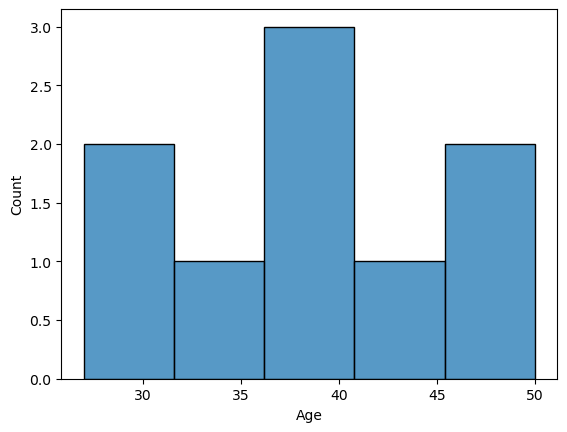

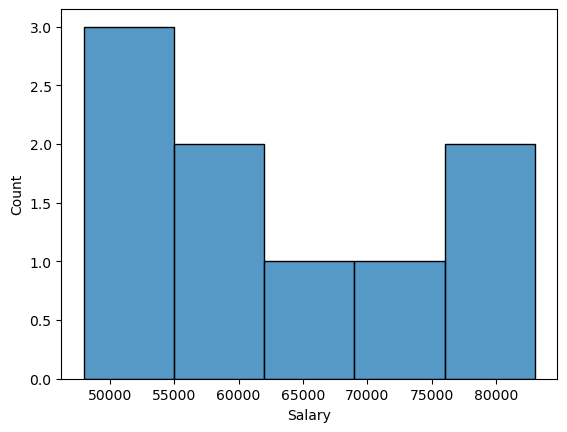

------------------------------------------------------------------------------------------------------------------------


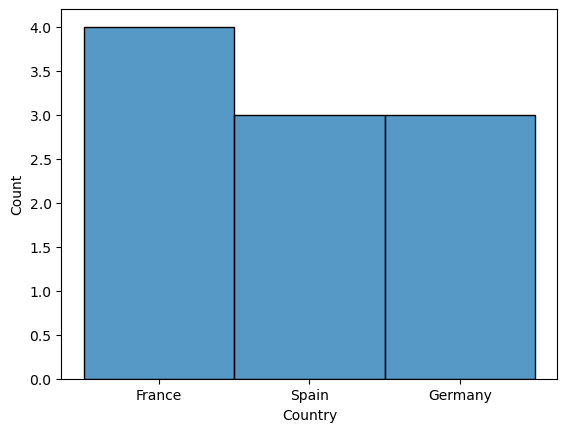

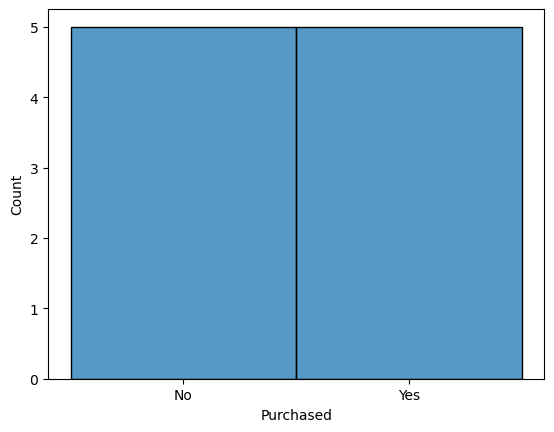

' for both at a time irrespective of the data type\nfor i in df.columns:\n    sns.histplot(data=df,x=i)\n    plt.show()\n'

In [9]:
# histogram to see the distribution of numerical data type columns
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()
print('------------'* 10)
# histogram to see the distribution of numerical object type columns
for i in df.select_dtypes(include='object').columns:
    sns.histplot(data=df,x=i)
    plt.show()
''' for both at a time irrespective of the data type
for i in df.columns:
    sns.histplot(data=df,x=i)
    plt.show()
'''

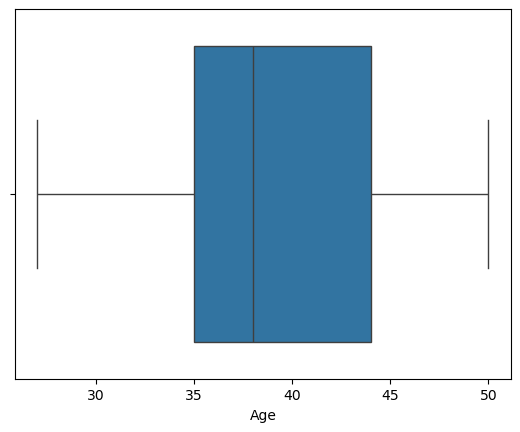

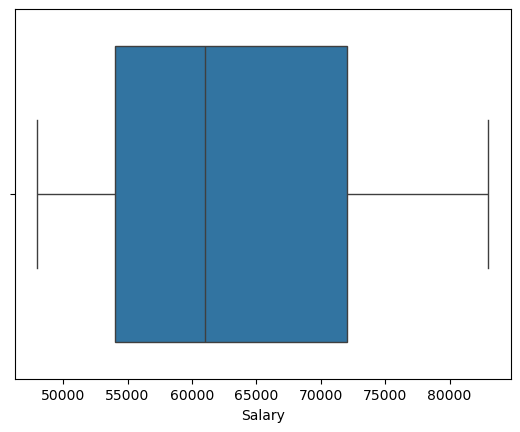

------------------------------------------------------------------------------------------------------------------------


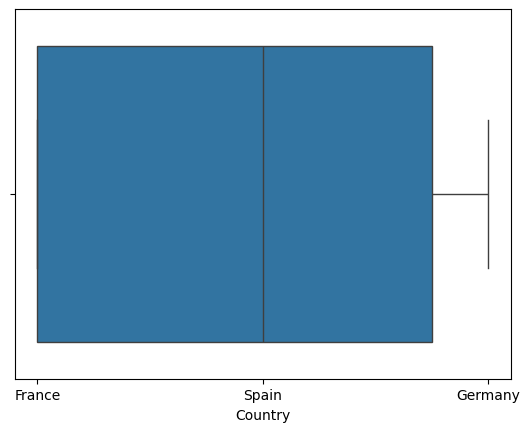

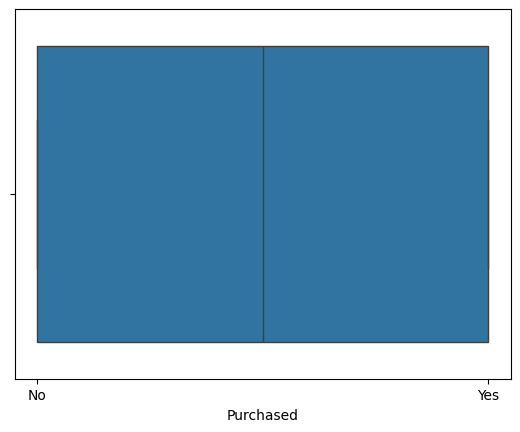

' for both at a time irrespective of the data type\nfor i in df.columns:\n    sns.boxplot(data=df,x=i)\n    plt.show()\n'

In [10]:
# boxplot to see the outliers of numerical data type columns
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()
print('------------'* 10)
# boxplot to see the outliers of numerical object type columns
for i in df.select_dtypes(include='object').columns:
    sns.boxplot(data=df,x=i)
    plt.show()
''' for both at a time irrespective of the data type
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()
'''

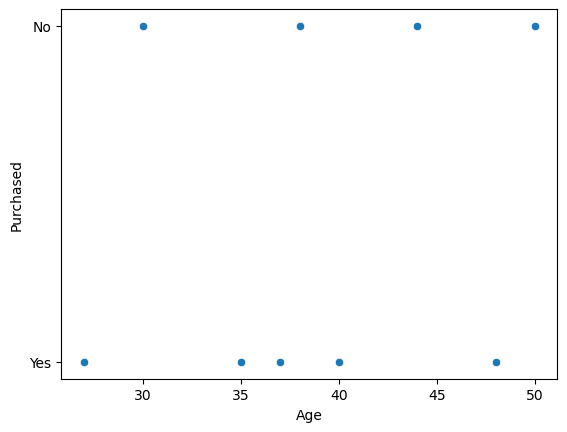

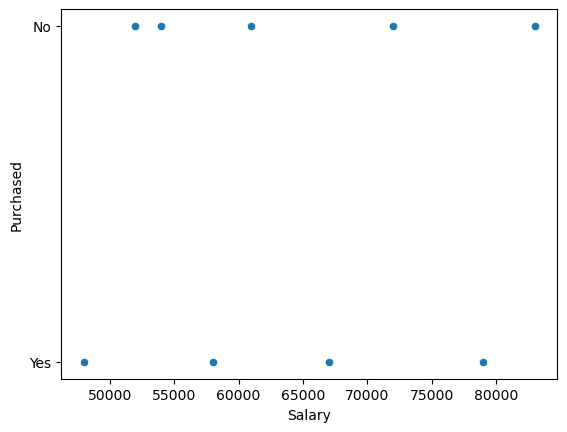

In [11]:
# using the scatterplot to define the relationship between the independent and dependent variables
for i in df.select_dtypes(include='number').columns:
    sns.scatterplot(data=df,x=i,y='Purchased')
    plt.show()

             Age    Salary
Age     1.000000  0.982495
Salary  0.982495  1.000000
**************************************************************************************************************


<Axes: >

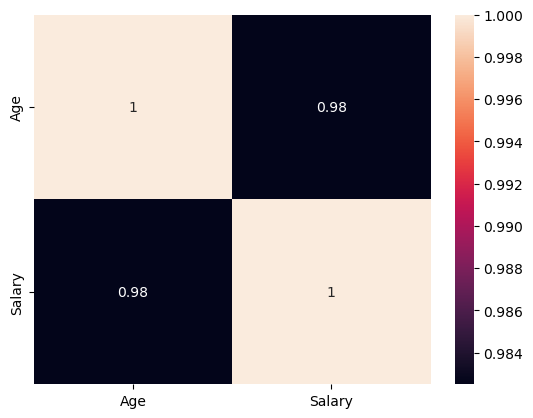

In [12]:
# heatmap to define correlation and multicollinearity
heatmap=df.select_dtypes(include='number').corr()
print(heatmap)
print('***********'*10)
# graphical representation
#plt.figure(figsize=(10,10))
sns.heatmap(heatmap,annot=True)


# Step 4: Missing Value Treatment

In [13]:
# Missing Value Treatment only eill do independent variable column values
# continuous data we can fill missing value with median/mean
# discrete and categorical data we can fill missing value with mode
df.isnull().sum()
'''
warnings.simplefilter(action='ignore',category=FutureWarning) # code to ignore the warning message
for i in ['Age','Salary']:
    print(df[i].median())
    df[i].fillna(df[i].median(),inplace=True)
'''
print('***********'*10)
# filling of object values
'''
for i in df.select_dtypes(include='object'):
    print(df[i].mode())
    df[i].fillna(df[i].mode()[0],inplace=True)
'''
# *******************************************************************
# using the sklearn module

from sklearn.impute import KNNImputer # fill the null valuesusing the mean value from n_neighbors(default==5) nearest neighbors found in the training set. 
impute=KNNImputer()
for i in df.select_dtypes(include='number').columns:
    df[i]=impute.fit_transform(df[[i]])

print(df)

x=df.iloc[:,:-1].values # only takes array like of shape
#x[:,1:]=impute.fit_transform(x[:,1:])
#x

**************************************************************************************************************
   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


In [14]:
''' if the count of null values are greater in a row/column it's better to eliminate for better model building
df.drop(['col1','col2'],axis=1,inplace=True) for column

df.drop(index num) dropping entire row
df1=df.dropna() drop all rows having null values
'''

" if the count of null values are greater in a row/column it's better to eliminate for better model building\ndf.drop(['col1','col2'],axis=1,inplace=True) for column\n\ndf.drop(index num) dropping entire row\ndf1=df.dropna() drop all rows having null values\n"

In [15]:
# this helps to reset the index after deleting some rows
df.reset_index(drop=True)

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


# Step 5: Outliers Treatment

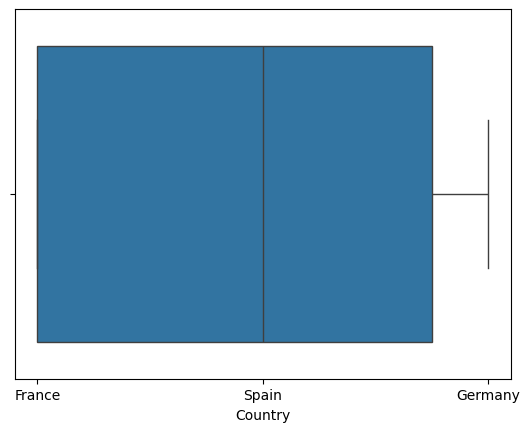

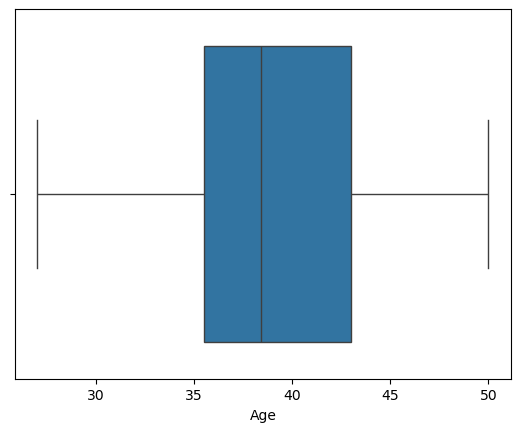

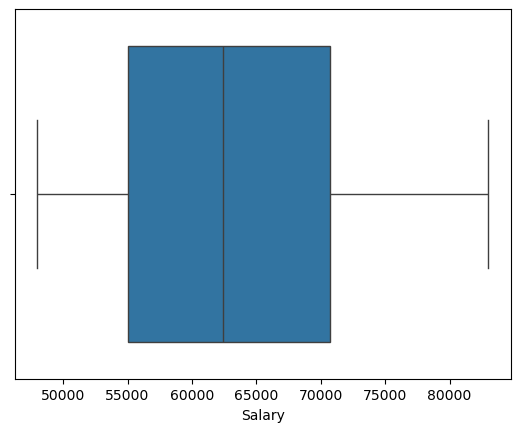

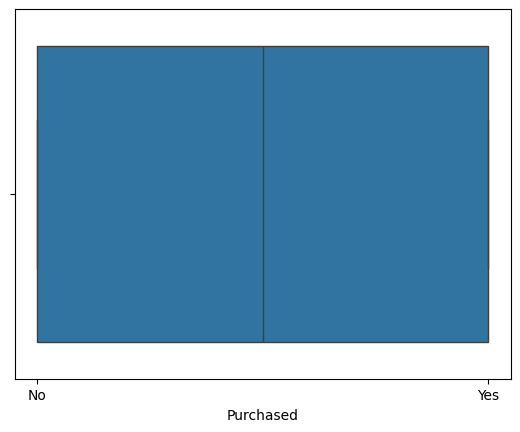

**********************************************************************************************************************************
[(np.float64(24.25), np.float64(54.25)), (np.float64(31375.0), np.float64(94375.0))]


In [16]:
# outliers treatment will be done to the continous numerical data of independent variables only
# graphical checkings of outliers
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()
print('*************'*10)
# finding lower and upper wisker values
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

print([i for i in (wisker(df['Age']),wisker(df['Salary']))])

# way of treating outliers
for i in ['Age','Salary']:
    lw,uw=wisker(df[i])
    # if the outliers fall behind the lower wisker will compare the value if yes --> replace with lw otherwise remains same
    df[i]=np.where(df[i]<lw,lw,df[i])
    # if the outliers fall above the upper wisker will compare the value if yes --> replace with uw otherwise remains same
    df[i]=np.where(df[i]>uw,uw,df[i])

# after again check graphically for outliers

# Step 6: Duplicates & Garbage Value Treatment

In [17]:
# drop the duplicate values using below function and garbage value we can treat by Step 4
df.drop_duplicates()

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


# Step 7: Encoding

In [18]:
# converting categorical data into boolean for ease of model building
dummy=pd.get_dummies(data=df,columns=['Country','Purchased'],drop_first=True)
dummy

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44.000000,72000.000000,False,False,False
1,27.000000,48000.000000,False,True,True
2,30.000000,54000.000000,True,False,False
3,38.000000,61000.000000,False,True,False
4,40.000000,63777.777778,True,False,True
5,35.000000,58000.000000,False,False,True
6,38.777778,52000.000000,False,True,False
7,48.000000,79000.000000,False,False,True
8,50.000000,83000.000000,True,False,False
9,37.000000,67000.000000,False,False,True


In [19]:
# merging a series of data to exisitng df
stat=df.describe().T
a=pd.Series(df.select_dtypes(include='number').isnull().sum(),name='null_values')
# based on indexes in both df and series the merge operation will works here
pd.merge(stat,a,left_index=True,right_index=True)

,count,mean,std,min,25%,50%,75%,max,null_values
Age,10.0,38.777778,7.253777,27.0,35.5,38.388889,43.0,50.0,0
Salary,10.0,63777.777778,11564.099406,48000.0,55000.0,62388.888889,70750.0,83000.0,0


In [36]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
oc = OneHotEncoder()
column_features=['Country','Purchased']
oc.fit(df[column_features])

OneHotEncoder()

In [37]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes
